<h3>Задание 2. Бифуркационный анализ системы ОДУ

**Модель №2**  

Заданная вариантом модель описывается следующей нелинейной системой ОДУ:  
  
<div style="text-align: center">

$\begin{cases}
{dx \over dt} = k_1z - k_{-1}x - k_2z^2x, 
\\
{dy \over dt} = k_3z^2 - k_{-3}y,
\end{cases}$  

</div>
  
где $z = 1 - x - 2y$.


Система рассматривается на фазовом пространстве S:  
<div style="text-align: center">  

$S = \left\{0 \le x \le 1, 0 \le y \le 0.5, 0 \le x + 2y \le 1 \right\}$  
</div> 


**Постановка задачи однопараметрического анализа:**
1. Используя аналитические методы продолжения по параметру, построить зависимость  
стационарных решений $x_c$ и $y_c$ от параметра $k_1$ ($k_2$) для нескольких значений  
параметра $k_{-1}$: {0.001, 0.005, 0.01, 0.015, 0.02}  
2. Используя аналитические методы продолжения по параметру, построить зависимость  
стационарных решений $x_c$ и $y_c$ от параметра $k_1$ ($k_2$) для нескольких значений  
параметра $k_{-3}$: {0.0005, 0.001, 0.002, 0.003, 0.004}
3. Исследуя след и определитель матрицы Якоби на стационаре, найти точки  
бифуркаций, уточнить их и отметить на графиках.

In [81]:
from sympy import symbols, Symbol, solve, Eq, lambdify
import numpy as np

# Определение символьных переменных
x, y, z = symbols('x y z')
k1 = Symbol("k1")
k1m = Symbol("k1m")
k2 = Symbol("k2")
k3 = Symbol("k3")
k3m = Symbol("k3m")

**1. Анализ поведения стационарного решения $x_c(k_1)$ и $y_c(k_1)$ в зависимости от параметра $k_1$ при различных $k_{-1}$.**   

Стационарное решение $x_c(k_1)$ и $y_c(k_1)$ определяется как решение нелинейной системы  
<div style="text-align: center">  

$\begin{cases}
k_1z - k_{-1}x - k_2z^2x = 0, 
\\
k_3z^2 - k_{-3}y = 0.
\end{cases}$  
</div>  

Иногда прямую зависимость $x_c(k_1)$ и $y_c(k_1)$ найти не удается, тогда используется алгоритм продолжения решения по параметру.
 


In [82]:
# Определение символьных выражений
z = 1 - x - 2*y
f1 = k1 * z  - k1m * x - k2 * z**2 * x
f2 = k3 * z**2 - k3m * y

Символьное решение стационарной системы

In [106]:
# Создание и решение однородной системы уравнений
system = [Eq(f1, 0), Eq(f2, 0)]
solutions = solve(system, (x, k1)) 

Ниже приведены две пары решений системы $x(y)$ и $k_1(y)$

In [118]:
solutions[0][0]

-2*y + 1 - sqrt(k3**3*k3m*y)/k3**2

In [110]:
solutions[0][1]

-(k1m*k3 + k2*k3m*y)/k3 - sqrt(k3**3*k3m*y)*(2*y - 1)*(k1m*k3 + k2*k3m*y)/(k3**2*k3m*y)

In [111]:
solutions[1][0]

-2*y + 1 + sqrt(k3**3*k3m*y)/k3**2

In [112]:
solutions[1][1]

-(k1m*k3 + k2*k3m*y)/k3 + sqrt(k3**3*k3m*y)*(2*y - 1)*(k1m*k3 + k2*k3m*y)/(k3**2*k3m*y)

In [144]:
x_sol0 = solutions[0][0]
k1_sol0 = solutions[0][1]
x_sol1 = solutions[1][0]
k1_sol1 = solutions[1][1]

x_func0 = lambdify((y, k3, k3m), x_sol0)
x_func1 = lambdify((y, k3, k3m), x_sol1)
k1_func0 = lambdify((y, k1m, k2, k3, k3m), k1_sol0)
k1_func1 = lambdify((y, k1m, k2, k3, k3m), k1_sol1)


В данном случае удалось построить решение $x(y)$ и $k_1(y)$, следовательно применяется алгоритм продолжения по параметру.  
Считая $y$ независимой переменной, по набору $\left\{y_k: 0 = y_0 \le y_1 \le ... \le y_N = 0.5 \right\}$ определим значения параметра $k_1(y_k)$  
и переменной $x(y_k)$.
 

In [145]:
# Зависимость стационарных решений от k1
k1m_vals = [0.001, 0.005, 0.01, 0.015, 0.02] 
k2val = 2.5
k3m_val = 0.001
k3val = 0.0032

y_k = np.linspace(0, 0.5, 100)


Ниже приведены графики $x_c(k_1)$ и $y_c(k_1)$ - зависимостей стационарного решения исходной системы от параметра $k_1$,  
при различных значениях параметра $k_{-1}$.

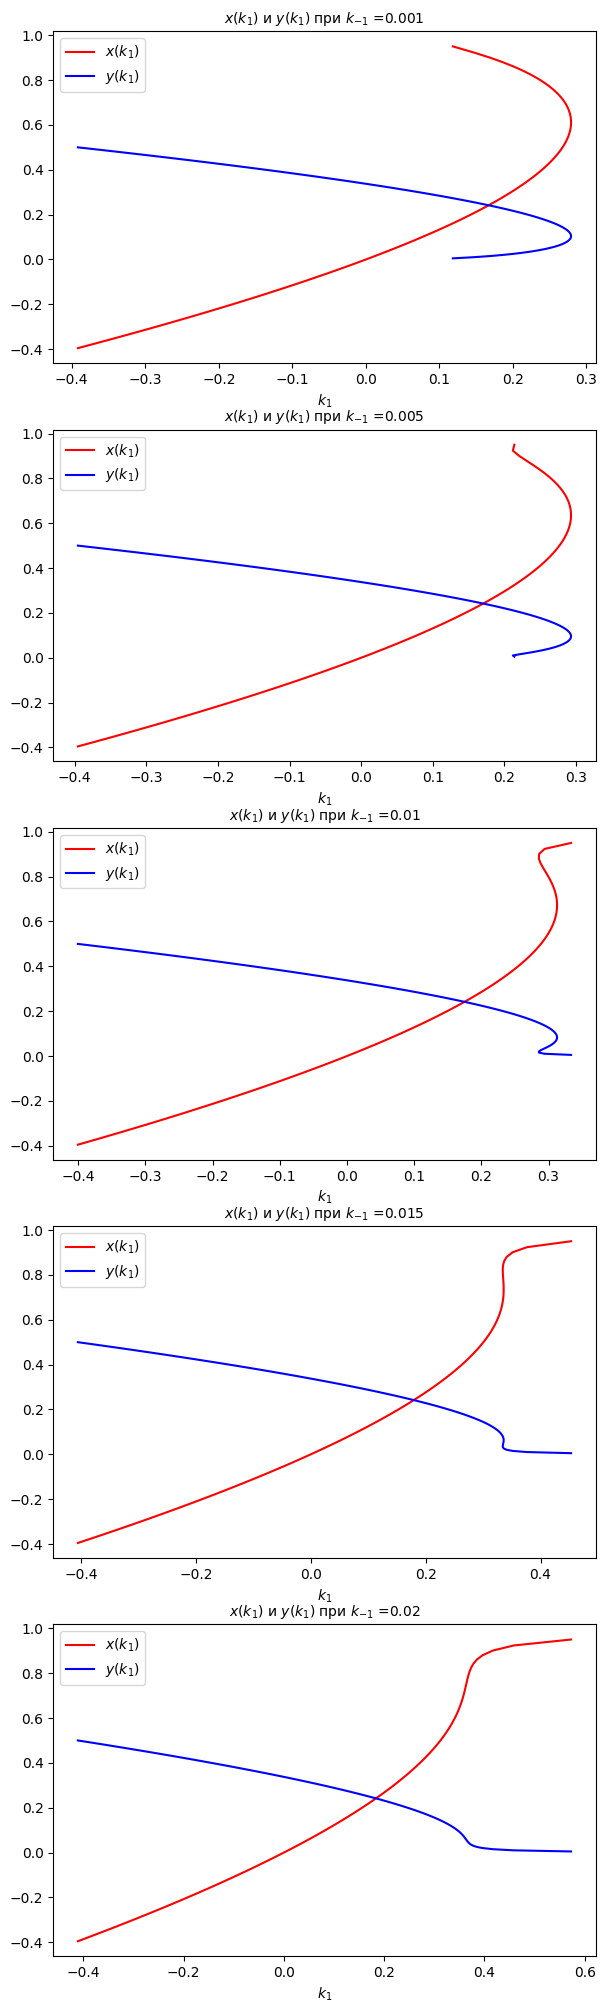

In [154]:
import matplotlib.pyplot as plt

# Построение графиков
plt.figure(figsize=(7, 25))
plt.rc('axes', titlesize= 10)

for i in range(len(k1m_vals)):
    x_f0 = x_func0(y_k, k3val, k3m_val)
    x_f1 = x_func1(y_k, k3val, k3m_val)
    k1_f0 = k1_func0(y_k, k1m_vals[i], k2val, k3val, k3m_val)
    k1_f1 = k1_func1(y_k, k1m_vals[i], k2val, k3val, k3m_val)
    
    # Построение графиков
    plt.subplot(5, 1, i + 1)
    plt.plot(k1_f0, x_f0, color = 'red', label='$x(k_1)$')
    plt.plot(k1_f0, y_k, color = 'blue', label='$y(k_1)$')
    plt.title('$x(k_1)$ и $y(k_1)$ при $k_{-1}$ =' + str(k1m_vals[i]))
    plt.xlabel('$k_1$')
    plt.legend(['$x(k_1)$', '$y(k_1)$'])

plt.show()


**2. Анализ поведения стационарного решения $x_c(k_1)$ и $y_c(k_1)$ в зависимости от параметра при различных $k_{-3}$**   

Проведем аналогичные вычисления зависимостей $x_c(k_1)$ и $y_c(k_1)$ - стационарного решения от параметра $k_1$,  
при различных значениях параметра $k_{-3}$: {0.0005, 0.001, 0.002, 0.003, 0.004}. Ниже приведены соответсвующие графики. 

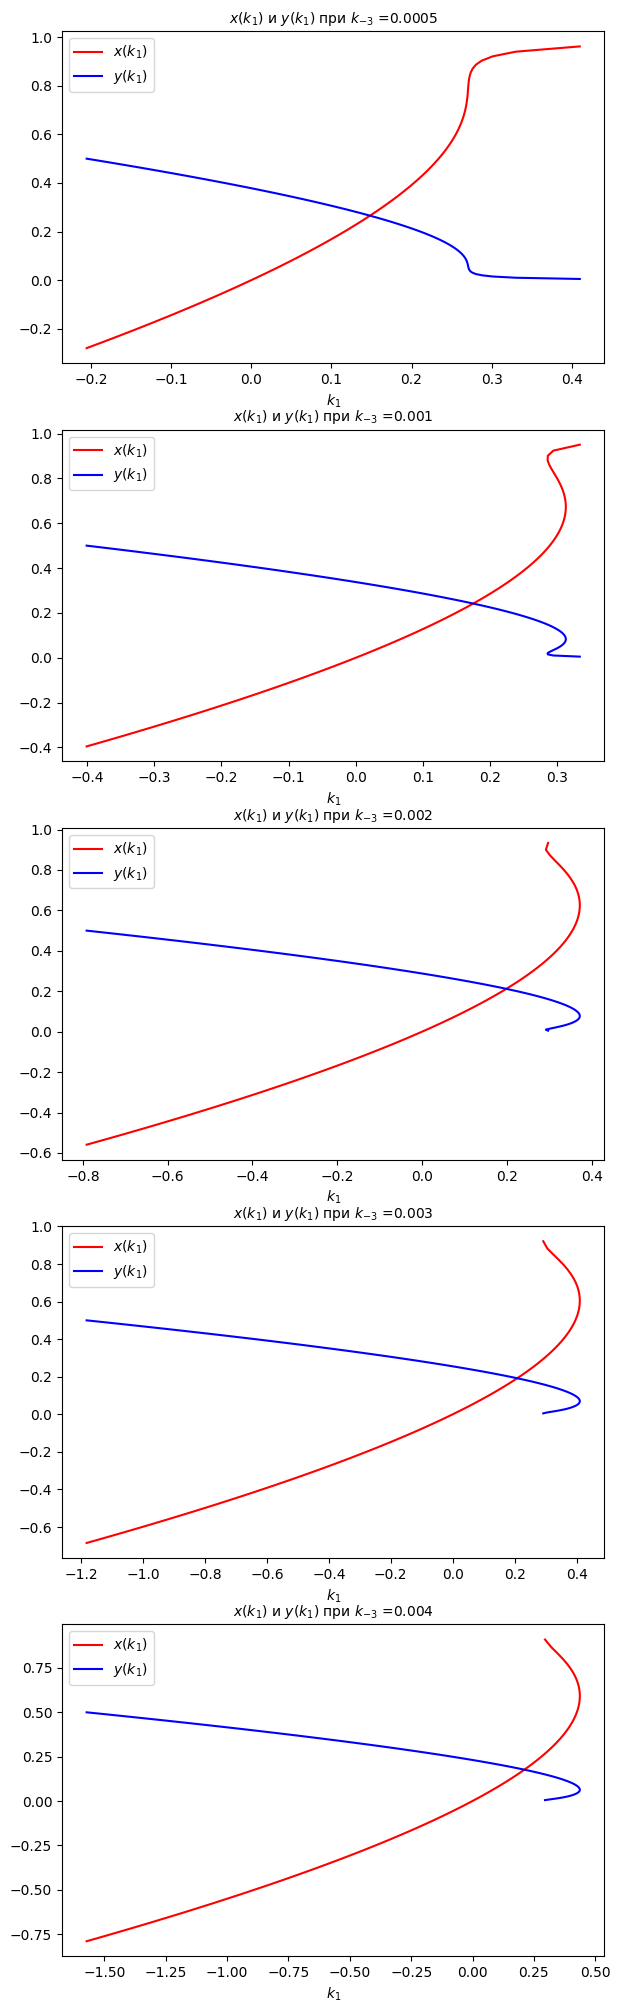

In [153]:
# Зависимость стационарных решений от k1
k1m_val = 0.01 
k2val = 2.5
k3m_vals = [0.0005, 0.001, 0.002, 0.003, 0.004]
k3val = 0.0032

# Построение графиков
plt.figure(figsize=(7, 25))
plt.rc('axes', titlesize= 10)

for i in range(len(k3m_vals)):
    x_f0 = x_func0(y_k, k3val, k3m_vals[i])
    x_f1 = x_func1(y_k, k3val, k3m_vals[i])
    k1_f0 = k1_func0(y_k, k1m_val, k2val, k3val, k3m_vals[i])
    k1_f1 = k1_func1(y_k, k1m_val, k2val, k3val, k3m_vals[i])
    
    # Построение графиков
    plt.subplot(5, 1, i + 1)
    plt.plot(k1_f0, x_f0, color = 'red', label='$x(k_1)$')
    plt.plot(k1_f0, y_k, color = 'blue', label='$y(k_1)$')
    plt.title('$x(k_1)$ и $y(k_1)$ при $k_{-3}$ =' + str(k3m_vals[i]))
    plt.xlabel('$k_1$')
    plt.legend(['$x(k_1)$', '$y(k_1)$'])

plt.show()


**3. Нахождение точек бифуркации и их уточнение.**   

Для определения типа и устойчивости стационарного решения $x(k_1)$, $y(k_1)$ необходимо найти  
собственные значения матрицы Якоби на стационаре при текущем значении параметра.   

In [155]:
from sympy import Matrix

F = Matrix([f1, f2])
var_vector = Matrix([x, y])
jacA = F.jacobian(var_vector)

traceA = jacA.trace()
detA = jacA.det()